In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv


In [22]:
mental_frame = pd.read_csv('/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv')
mental_frame.drop(labels ='Unnamed: 0', axis = 1, inplace = True)
mental_frame.dropna(inplace = True)

In [16]:
print(mental_frame.head())
print(mental_frame.info())
print(mental_frame.columns)

                                           statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB
None
Index(['statement', 'status'], dtype='object')


In [18]:
print(mental_frame['status'].value_counts())

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


In [20]:
#find and handle missing data
print(mental_frame.isna().sum())

statement    362
status         0
dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Depression'),
  Text(2, 0, 'Suicidal'),
  Text(3, 0, 'Anxiety'),
  Text(4, 0, 'Bipolar'),
  Text(5, 0, 'Stress'),
  Text(6, 0, 'Personality disorder')])

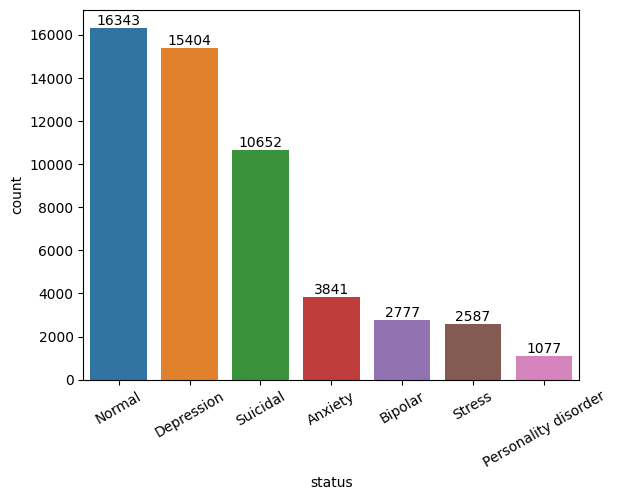

In [38]:
#visualizations

#the only real visualization to perform at this stage is a bar chart of value counts for the status column

import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(mental_frame, x='status',order=mental_frame['status'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30)